In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

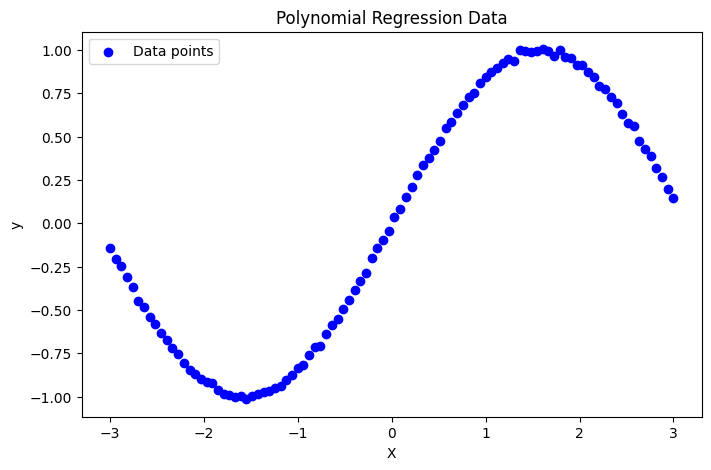

In [8]:
# Number of samples
n_samples = 100

# Generate random x values
X = np.linspace(-3, 3, n_samples)
# Generate y values with a quadratic relationship plus some noise
y = np.sin(X) + np.random.randn(n_samples) * 0.01

# Plot the data
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression Data')
plt.legend()
plt.show()

## Polynomial Regression Model Build

In [9]:
class PolynomialRegressionModel:
    def __init__(self, lr=0.001):
        self.lr = lr
        self.w1 = 0
        self.w2 = 0
        self.w3 = 0
        self.b = 0

    def fit(self, X, y, epoch):
        
        sample_size = len(X)

        for _ in range(epoch):
            w1_grad = 0
            w2_grad = 0
            w3_grad = 0
            b_grad = 0
            
            total_error = 0
            for idx, x in enumerate(X):
                y_pred = self.w1 * x**3 + self.w2 * x ** 2 + self.w3 * x + self.b
                total_error += (y[idx] - y_pred) ** 2

                w1_grad += (-2 / sample_size) * x**3 * (y[idx] - y_pred)
                w2_grad += (-2 / sample_size) * x**2 * (y[idx] - y_pred)
                w3_grad += (-2 / sample_size) * x * (y[idx] - y_pred)
                b_grad += (-2 / sample_size) * (y[idx] - y_pred)

            # update weight and bias
            self.w1 -= self.lr * w1_grad
            self.w2 -= self.lr * w2_grad
            self.w3 -= self.lr * w3_grad
            self.b -= self.lr * b_grad

    def predict(self, X):
        y_pred = []
        for x in X:
            y_pred.append(self.w1 * x**3 + self.w2 * x ** 2 + self.w3 * x + self.b)
        
        return np.array(y_pred)

In [10]:
clf = PolynomialRegressionModel()
clf.fit(X, y, epoch=1000)

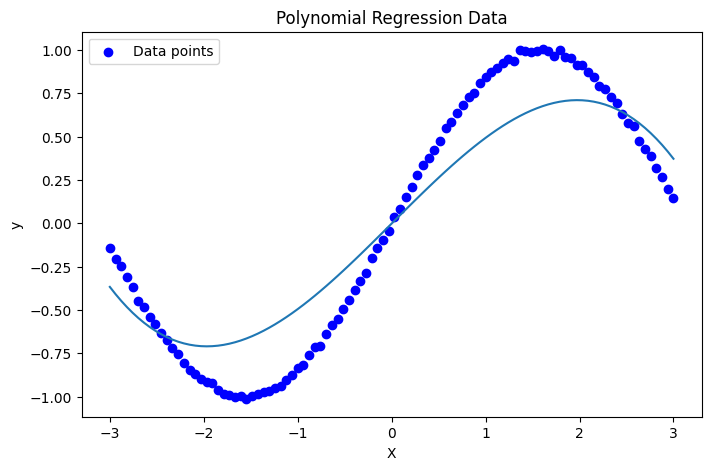

In [11]:
# Plot the data
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, [clf.w1 * x**3 + clf.w2 * x ** 2 + clf.w3 * x + clf.b for x in X])
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression Data')
plt.legend()
plt.show()